In [1]:
!pip install matplotlib seaborn scipy


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


The dataset contains 20429 rows and 962 columns.

Prime data:


,T_data_1_1_minute_01,T_data_1_2_minute_01,T_data_1_3_minute_01,T_data_2_1_minute_01,T_data_2_2_minute_01,T_data_2_3_minute_01,T_data_3_1_minute_01,T_data_3_2_minute_01,T_data_3_3_minute_01,T_data_4_1_minute_01,...,T_data_3_3_minute_60,T_data_4_1_minute_60,T_data_4_2_minute_60,T_data_4_3_minute_60,T_data_5_1_minute_60,T_data_5_2_minute_60,T_data_5_3_minute_60,H_data_minute_60,AH_data,quality
0,0.514620,0.476471,0.517857,0.437500,0.534091,0.392045,0.766323,0.601351,0.769492,0.463687,...,0.725753,0.441341,0.534091,0.443182,0.687117,0.730539,0.720238,0.22288,0.237785,376.0
1,0.672515,0.682353,0.708333,0.431818,0.392045,0.454545,0.457045,0.368243,0.315254,0.486034,...,0.157191,0.491620,0.039773,0.528409,0.527607,0.556886,0.523810,0.07440,0.262215,456.0
2,0.625731,0.570588,0.857143,0.715909,0.215909,0.494318,0.525773,0.486486,0.494915,0.452514,...,0.511706,0.279330,0.363636,0.250000,0.374233,0.335329,0.291667,0.50688,0.216612,406.0
3,0.532164,0.376471,0.529762,0.568182,0.585227,0.590909,0.501718,0.570946,0.491525,0.541899,...,0.488294,0.117318,0.312500,0.352273,0.478528,0.500991,0.498988,0.81280,0.319218,424.0
4,0.403509,0.452941,0.315476,0.318182,0.278409,0.306818,0.570447,0.557432,0.552542,0.312849,...,0.561873,0.435754,0.471591,0.443182,0.496933,0.497006,0.482143,0.47504,0.045603,384.0


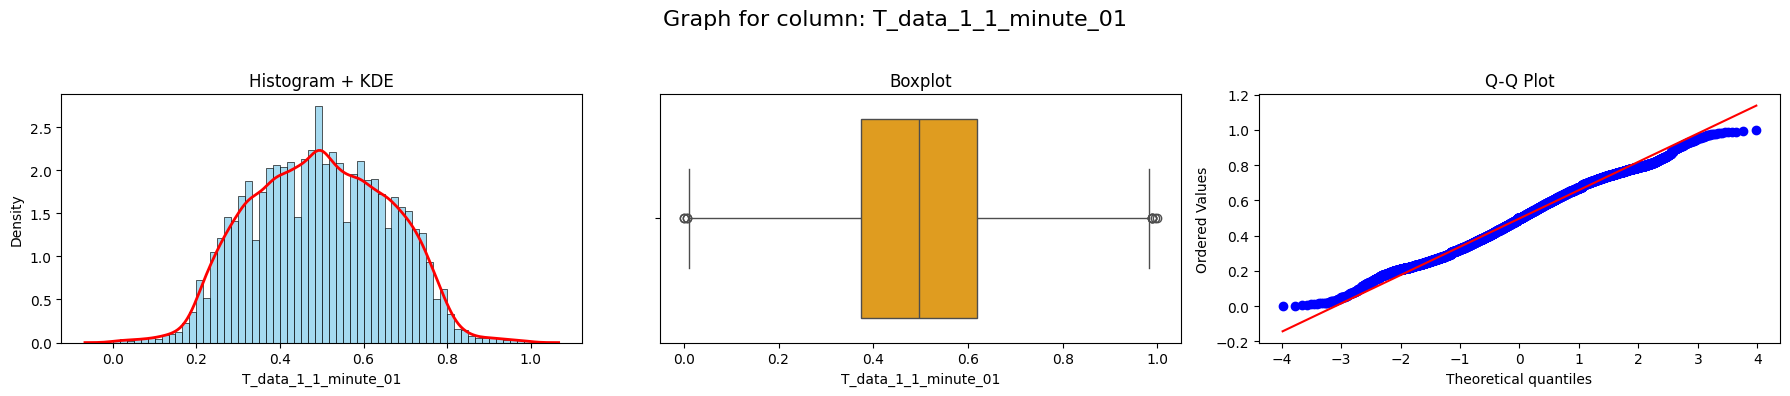

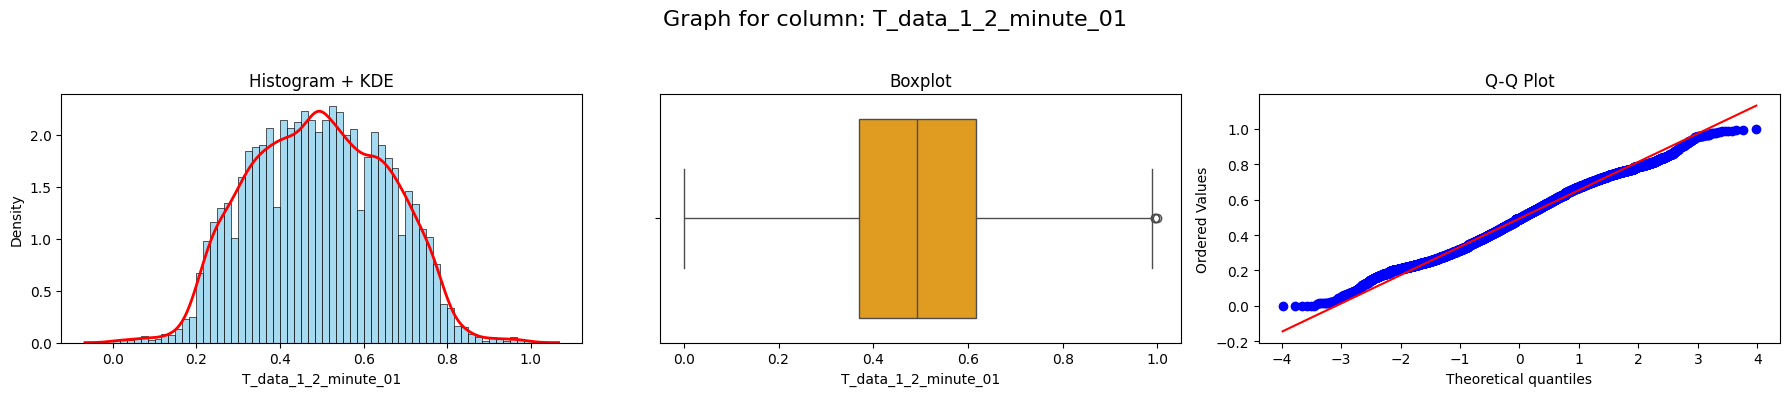

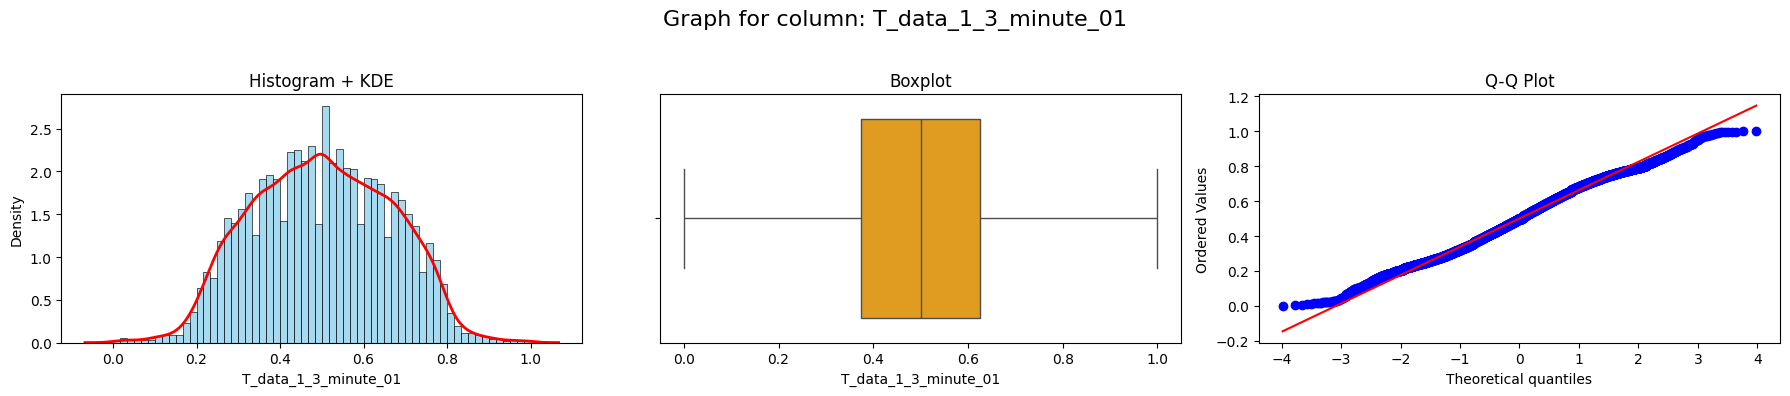

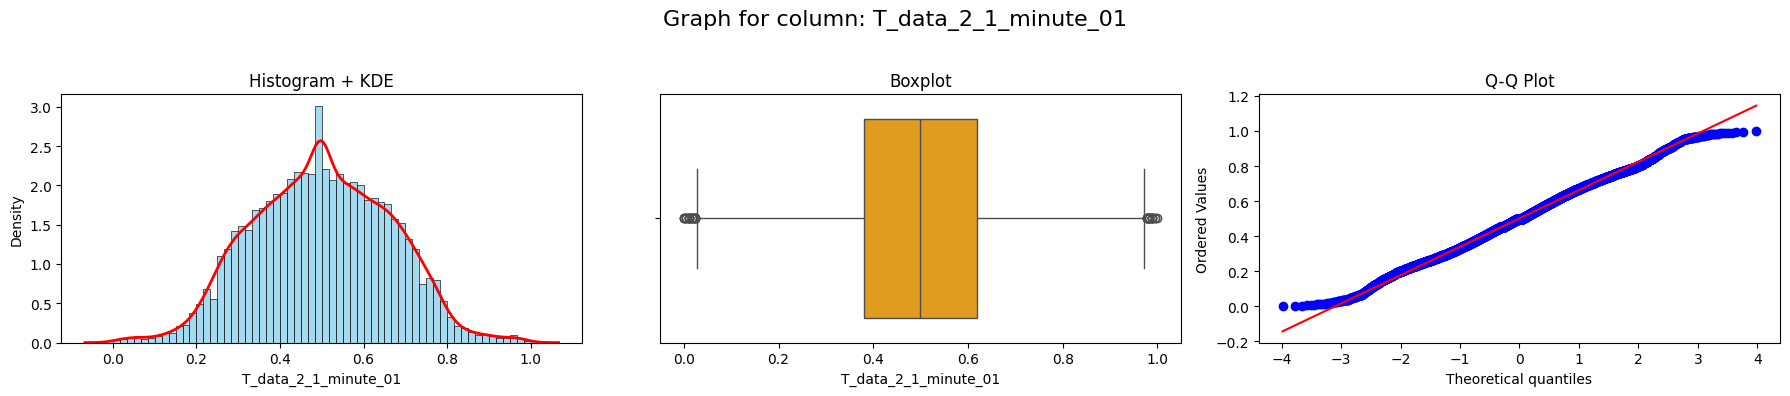

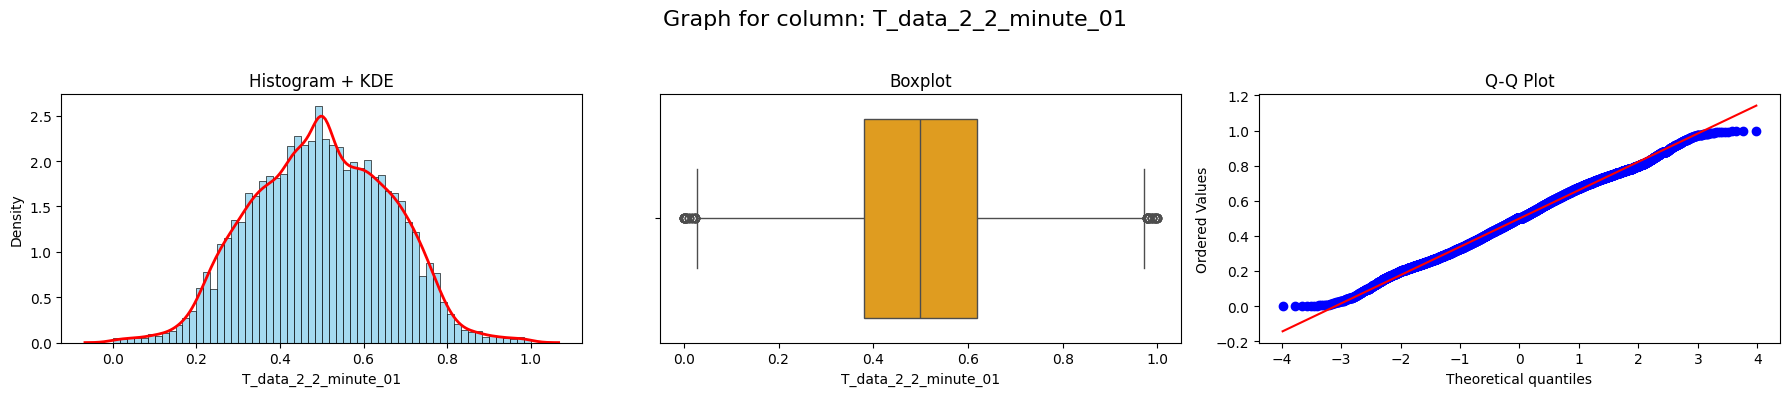

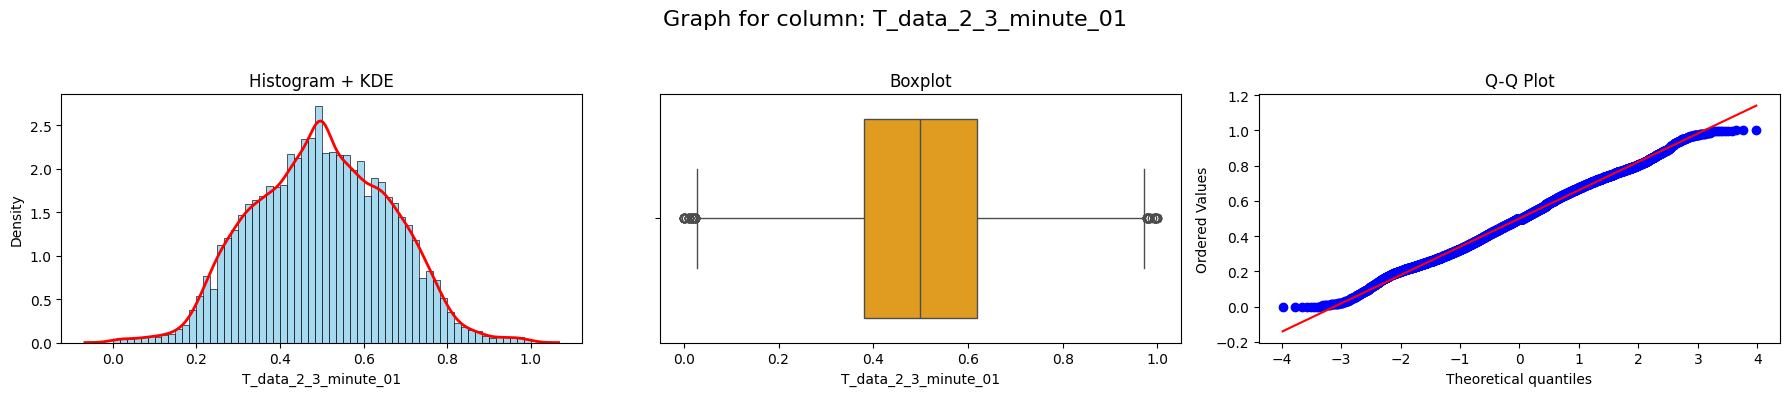

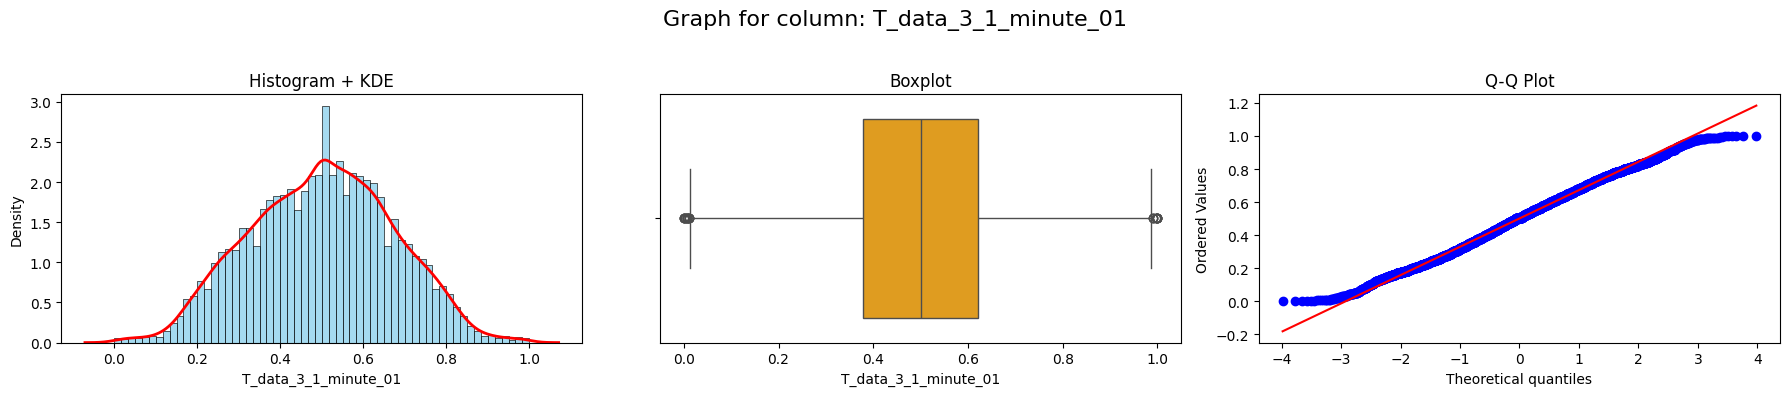

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

# filename = '../../resources/processed_data/data_train_Group_Out_Cluster_clean.arff'
filename = input("Enter the path to your .csv or .arff file: ").strip()

ext = os.path.splitext(filename)[1]

if ext == '.csv':
    df = pd.read_csv(filename, encoding='utf-8')
elif ext == '.arff':
    from scipy.io import arff
    data, meta = arff.loadarff(filename)
    df = pd.DataFrame(data)
else:
    print("⚠️ Invalid file! Please use .csv or .arff.")
    df = None

if df is not None:
    for col in df.columns:
        if df[col].dtype == object:
            try:
                df[col] = df[col].apply(lambda x: float(x.decode('utf-8')) if isinstance(x, bytes) else float(x))
            except:
                pass

    print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

    print("Prime data:")
    display(df.head())

    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns[:7]

    for col in numeric_cols:
        data_col = df[col].dropna()

        fig, axes = plt.subplots(1, 3, figsize=(18, 4))
        fig.suptitle(f'Graph for column: {col}', fontsize=16)

        sns.histplot(data_col, bins=60, stat='density', color='skyblue', kde=False, ax=axes[0])
        sns.kdeplot(data_col, color='red', linewidth=2, ax=axes[0])
        axes[0].set_title('Histogram + KDE')
        axes[0].set_xlabel(col)

        sns.boxplot(x=data_col, color='orange', ax=axes[1])
        axes[1].set_title('Boxplot')
        axes[1].set_xlabel(col)

        stats.probplot(data_col, dist="norm", plot=axes[2])
        axes[2].set_title('Q-Q Plot')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
